#### Jérémy TREMBLAY

# TP1: Polynomial regression

In [33]:
# Import the library that will be used in this notebook.
import pandas as pd
import numpy as np
import random
import math

# Import the pyplot module from matplotlib with the plt alias.
import matplotlib.pyplot as plt

# Other usefull libraries (sklearn, ...)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

## Task 7: Define a function with numpy

**Consigne :** Définir la fonction qui prend en entrée un ensemble de valeurs (un vecteur) et qui retourne
pour chaque valeur x, sa valeur *f(x)*. Vous pouvez utiliser numpy pour simplifier votre fonction
au maximum. La valeur *ϵ* évite la division par 0. Elle est disponible avec le package `numpy` :
`np.finfo(np.float32).eps`.

In [34]:
def f(x):
    """
    Calculate the function value for a given input 'x' using a mathematical formula.

    This function computes the value of a mathematcal expression involving the sine function and a mathematical constant.

    Parameters:
    x (float or array-like): The input value(s) for which the function value is to be calculated.

    Returns:
    float or array-like: The calculated function value(s) based on the provided input(s).

    Formula:
    f(x) = (12 * sin(x)) / (x + ε)

    Where:
    - 'sin(x)' represents the sine of 'x'.
    - 'ε' (epsilon) is a very samll positive constant to prevent division by zero when 'x' is close to zero.
    """
    return 12 * math.sin(x) / (x + np.finfo(np.float32).eps)

## Task 8: Add a random noise

**Consigne :** Ajouter un bruit aléatoire de moyenne 0 et d’écart-type 1 à chaque point de la fonction. Générer
un ensemble de 40 données à partir de la fonction *f* dans l’intervalle [-3, 10].

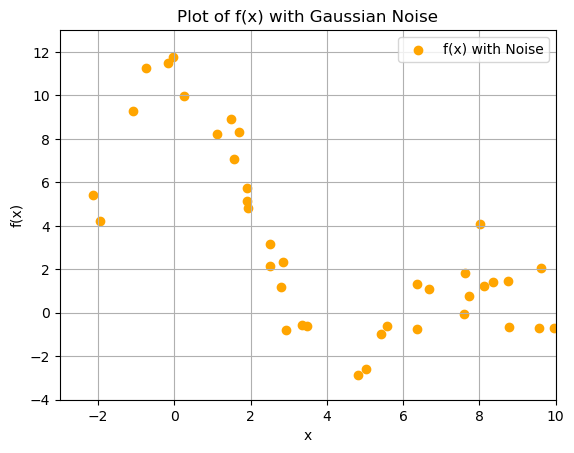

In [35]:
# Generate 40 points of the function for random values of x in the range [-3, 10].
number_of_points = 40
x_values = [random.uniform(-3, 10) for _ in range(number_of_points)]
f_original = [f(x) for x in x_values] # Data without noise.
# Here is the difference : we add a gaussian noise by using the normal function form the numpy module.
f_values = [f(x) + np.random.normal(0, 1) for x in x_values]

# Plot just the points.
plt.scatter(x_values, f_values, color='orange', marker='o', label='f(x) with Noise')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) with Gaussian Noise')
plt.legend()
plt.ylim(-4, 13)
plt.xlim(-3, 10)
plt.grid(True)
plt.show()

# Task 9: Split train and test data

**Consigne :** Nous allons proposer de découper notre base de données. Pour cela, nous allons utiliser la librairie `scikit-learn` qui permet de séparer rapidement les données.
On préserve ici un tiers des données pour la validation du modèle.

In [36]:
# Let's split data.
X_train, X_test, y_train, y_test = train_test_split(x_values, f_values, test_size=0.33, random_state=12)

# Task 10: Create an estimator

**Consigne :** À l’aide de la librairie `scikit-learn` et sa fonction `make_pipeline`, créer un estimateur composé à la fois de la transformation des données et du modèle. On choisira comme modèle un *Ridge*.

In [37]:
degree = 1  # Polynomial degree, defined in the next task.
model = make_pipeline(PolynomialFeatures(degree), Ridge())

# Task 11: Use the pipeline for a 1 degree model

**Consigne :** Utiliser votre pipeline pour définir un modèle de degré 1. Faites apprendre ce modèle sur les données d’apprentissage et affichez ses performances.

In [38]:
X_train_reshaped = [[x] for x in X_train]  # Reshape data.
model.fit(X_train_reshaped, y_train)  # Fit the model.

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('ridge', Ridge())])

In [39]:
# Test the model and save the predictions.
y_pred = model.predict(X_train_reshaped)

Now let's display data !

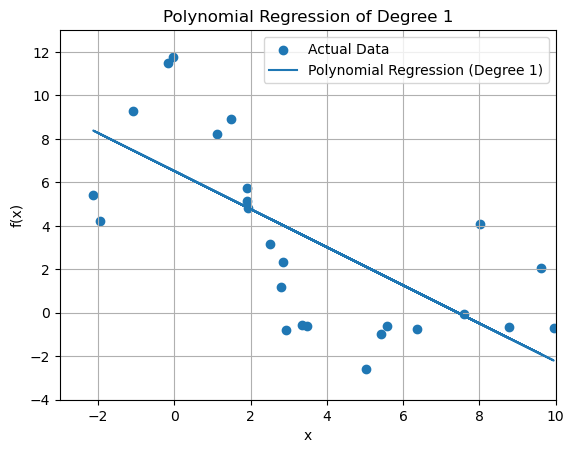

In [40]:
plt.scatter(X_train, y_train, marker='o', label='Actual Data')
plt.plot(X_train, y_pred, label='Polynomial Regression (Degree 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Regression of Degree 1')
plt.legend()
plt.ylim(-4, 13)
plt.xlim(-3, 10)
plt.grid(True)
plt.show()

It seems a consistent result but it is still too crude.

# Task 12: Do the same for different degrees

**Consigne :** : Faites de même pour les degrés `[1, 2, 3, 6, 9, 12]`. Elle permet de générer des données dans un intervalle donné.

/nix/store/lcs7vmb8ka8z8hzcfhdc1swjsqx6wvvc-python3-3.10.12-env/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.70245e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/nix/store/lcs7vmb8ka8z8hzcfhdc1swjsqx6wvvc-python3-3.10.12-env/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.56967e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


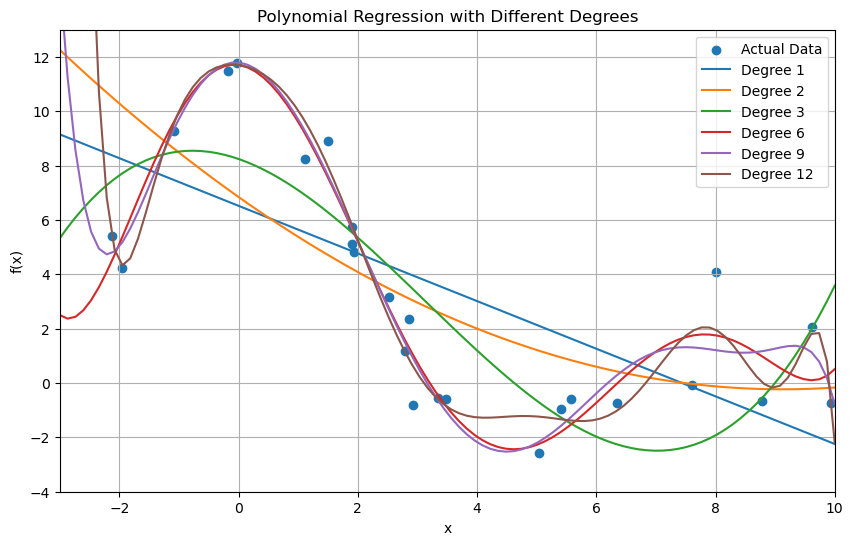

In [41]:
# Let's definie all the degrees that we will use.
degrees = [1, 2, 3, 6, 9, 12]

# Use to stock the models.
models = []
predictions = []

# Prepare to display data.
plt.figure(figsize=(10, 6))

# Fit all the model for each degree and display their curves on a figure.
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), Ridge()) # Create model.
    model.fit(X_train_reshaped, y_train) # Fit model.
    models.append(model)

# Used to display correctly data and to avoid an unreadble graph because of the cursed curves and X_train.
x_range = np.linspace(-3, 10, 100)

# Predict for each degree.
predictions = []
for model in models:
    y_pred = model.predict([[x] for x in x_range])  # Test model.
    predictions.append(y_pred)  

# Display real data.
plt.scatter(X_train, y_train, marker='o', label='Actual Data')

# Display regression curves.
for i, degree in enumerate(degrees):
    plt.plot(x_range, predictions[i], label=f'Degree {degree}')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Polynomial Regression with Different Degrees')
plt.legend()
plt.ylim(-4, 13)
plt.xlim(-3, 10)
plt.grid(True)
plt.show()

# Task 13: Define error function

**Consigne :** Nous allons maintenant calculer l’erreur d’un modèle. Nous allons ici utiliser la somme des erreurs résiduelles au carrés et non l’erreur moyenne quadratique. La fonction d’erreur RSS est définie telle que : `RSS = Somme (yi - f(xi))² pour i = 1 jusqu'à N`.  
Créez cette nouvelle fonction d’erreur et évaluez l’erreur obtenue sur les données d’apprentissage pour les modèles de différents degrés.

Let's define the error function first.

In [42]:
def rss(data, pred):
    """
    Calculate the Residual Sum of Square (RSS) for a given dataset and its corresponding predicted values.

    RSS is a statistical measure that quantfies the sum of the squared differences between the observed data and
    their corresponding predicted values in a regression model.

    Parameters:
    data (array-like): The observed or actual dataset.
    pred (array-like): The predicted values from a regression model.

    Returns:
    float: The RSS (Residual Sum of Squares) value, which measures the goodness of fit for the model.
    
    Formula:
    RSS = Σ(yi - ŷi)²

    Where:
    - yi represents the observed (actual) data point.
    - ŷi represents the correspoding predicted value.
    - Σ denotes the summation over all data points.

    A lower RSS indicates a better fit of the model to the observed data.
    """
    return np.sum((data - pred) ** 2)

We can use it now.

In [43]:
# We will use the same degrees as previously.

# We create a model for each degree.
models = []
RSS_values = []  # Use to stock the RSS values.

# Train each model and compute RSS.
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    X_train_reshaped = [[x] for x in X_train]
    model.fit(X_train_reshaped, y_train)
    models.append(model)
    
    # Predict results.
    y_pred = model.predict(X_train_reshaped)
    
    # Compute RSS.
    RSS_value = rss(y_train, y_pred)
    RSS_values.append(RSS_value)

# Display RSS values for each model.
for i, degree in enumerate(degrees):
    print(f'Degree {degree}: RSS of {RSS_values[i]:.2f}')

Degree 1: RSS of 294.09
Degree 2: RSS of 264.65
Degree 3: RSS of 184.87
Degree 6: RSS of 32.20
Degree 9: RSS of 28.91
Degree 12: RSS of 23.30


/nix/store/lcs7vmb8ka8z8hzcfhdc1swjsqx6wvvc-python3-3.10.12-env/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.70245e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/nix/store/lcs7vmb8ka8z8hzcfhdc1swjsqx6wvvc-python3-3.10.12-env/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.56967e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


# Task 14: Conclusion

**Consigne :** Que pouvez-vous en conclure ?

We can see 4 things:
* Higher polynomial degrees lead to lower RSS on the training data, as expected (like the curse seen before), because higher-degree models can fit the training data more closely.

* However, there is a point of diminishing returns, typically around degree 6, where the RSS stops decreasing significantly. It seems to be a good degree to use for this model (even if the other degrees have best performances).

* The models of degree 9 and 12 have nearly identical RSS values, suggesting that the degree 9 model is sufficiently complex to fit the data, and increasing the degree does not improve much the performance.

* We can note that RSS on the training data alone doesn't necessarily predict how well a model will generalize to new, unseen data (the test data). High-degree models might overfit the training data and not perform well on the test data.

# Task 15: Validation of the model

**Consigne :** Après avoir appris sur la base d’apprentissage, il est important de vérifier les performances du modèle sur de nouvelles données.  
Évaluez maintenant l’erreur obtenue sur les données de test pour les modèles de différents degrés.

In [44]:
# Create lists to store RSS values for test data.
RSS_test_values = []

# Calculate RSS for test data for each model.
for model in models:
    X_test_reshaped = [[x] for x in X_test]
    y_pred_test = model.predict(X_test_reshaped)
    RSS_test = rss(y_test, y_pred_test)
    RSS_test_values.append(RSS_test)

# Display RSS values for test data for each model.
for i, degree in enumerate(degrees):
    print(f'Degree {degree}: RSS of {RSS_test_values[i]:.2f}')

Degree 1: RSS of 97.75
Degree 2: RSS of 76.37
Degree 3: RSS of 108.04
Degree 6: RSS of 10.06
Degree 9: RSS of 11.60
Degree 12: RSS of 24.57


# Task 16: Conclusion

**Consigne :** Que peut-on remarquer ?

We can see 5 things:

* The mistakes (RSS) on the test data show some interesting stuff as the polynomial degrees of our models go up.

* Models with higher degrees usually got a lower RSS, which suggests they're better at guessing the test data.

* However, there is a big change at around the 6th-degree model. This model stands out with a significantly lower RSS compared to models with lower degrees (!!).

* Surprisingly, models of degree 9 and 12 got RSS values that are relatively close, indicating that the extra complexity from a 12th-degree polynomial doesn't provide a big improvement over the 9th-degree model. So the 9th degree fit better this data set.

* It's important to highlight that while we aim for lower RSS, it doesn't guarantee good guessing on new, unseen data...

In conclusion, the 6th-degree model is doing super well on the test data with a remarkably low RSS. This suggests it's finding a good balance between fitting the training data and guessing on the test data. In a real application we will choose this degree to fit our model.

# Task 17: By using R²

**Consigne :** Nous avons dans ce TP utilisé pour le moment deux métriques d’erreur : RSS et MSE. Une autre mesure bien connue pour les modèles de régression est le coefficient de détermination (aussi appelé *R-Squared* et noté *R²*). Il est définit par :  

`R² = 1 - RSS / Somme (yi - y barre)² pour i = 1 jusqu'à N`  

avec y barre la moyenne des observations.
La librairie `scikit-learn` propose également cette métrique. Il est également possible de récupérer la mesure *R²* directement depuis notre modèle à partir de sa méthode `score`.  
Calculez avec cette nouvelle mesure les performances des modèles à la fois sur la base d’apprentissage et de test.

Let's first compute *R²* manually. Let's define the corresponding function.

In [45]:
def r2(data, rss):
    """
    Calculate the R-squared (R²) value for a givn dataset.

    R-squared is a statistical measure that represents the proportion of the varance for the dependent variable
    that's explained by independent variables in a regression model.

    Parameters:
    data (array-like): The dataset for which R² is to be calculated.
    rss: The RSS value of the data (must be calculated before).

    Returns:
    float: The R-squared (R²) value, a number between 0 and 1, where a higher value indicates a better fit to the data.

    Formula:
    R² = 1 - (RSS / Σ(yi - ȳ)²)

    Where:
    - RSS (Residual Sum of Square) is a measure of the differences between the observed and predicted values.
    - Σ(yi - ȳ)² is the total sum of squares, representing the total variance in the data.

    The R-squared value quantifies how well the regression model fits the data, with 1 indicating a perfect fit
    and 0 indicating no relationship between the variables.
    """
    return 1 - (rss / np.sum((data - np.mean(data)) ** 2))

Let's now use it.

In [46]:
# Create lists to store R-squared values for both training and test dta.
r2_train_scores = []
r2_test_scores = []

# Calculate R-squared for training data using RSS values.
for RSS in RSS_values:
    r2_train = r2(y_train, RSS)
    r2_train_scores.append(r2_train)

# Calculate R-squared for tset data using RSS values.
for RSS_test in RSS_test_values:
    r2_test = r2(y_test, RSS_test)
    r2_test_scores.append(r2_test)

# Display R-squared values for both training and test data.
for i, degree in enumerate(degrees):
    print(f'Degree {degree}: R-squared (Train) of {r2_train_scores[i]:.4f}, R-squared (Test) of {r2_test_scores[i]:.4f}')


Degree 1: R-squared (Train) of 0.4414, R-squared (Test) of 0.5764
Degree 2: R-squared (Train) of 0.4973, R-squared (Test) of 0.6691
Degree 3: R-squared (Train) of 0.6489, R-squared (Test) of 0.5319
Degree 6: R-squared (Train) of 0.9388, R-squared (Test) of 0.9564
Degree 9: R-squared (Train) of 0.9451, R-squared (Test) of 0.9498
Degree 12: R-squared (Train) of 0.9557, R-squared (Test) of 0.8935


Let's now do the same thing but without this boilerplate code by using the score function fo `scikit-learn`.

In [47]:
# Reset lists.
r2_train_scores = []
r2_test_scores = []

# Alternatively, you can use the model's score method to get R-squared
for model in models:
    r2_train = model.score(X_train_reshaped, y_train)
    r2_train_scores.append(r2_train)
    X_test_reshaped = [[x] for x in X_test]
    r2_test = model.score(X_test_reshaped, y_test)
    r2_test_scores.append(r2_test)

# Display R-squared values for both training and test data.
for i, degree in enumerate(degrees):
    print(f'Degree {degree}: R-squared (Train) of {r2_train_scores[i]:.4f}, R-squared (Test) of {r2_test_scores[i]:.4f}')

Degree 1: R-squared (Train) of 0.4414, R-squared (Test) of 0.5764
Degree 2: R-squared (Train) of 0.4973, R-squared (Test) of 0.6691
Degree 3: R-squared (Train) of 0.6489, R-squared (Test) of 0.5319
Degree 6: R-squared (Train) of 0.9388, R-squared (Test) of 0.9564
Degree 9: R-squared (Train) of 0.9451, R-squared (Test) of 0.9498
Degree 12: R-squared (Train) of 0.9557, R-squared (Test) of 0.8935


The results are the same, everything seems to be coherent.  
Like said before, the best results seems to be for the degree=6, this is where we can see the best results for train and test dataset, and we should probably use this parameter value.